In [81]:
import gudhi.simplex_tree
import numpy as np

from gudhi import AlphaComplex

In [82]:
def generate_new_points(count: int):
    x = np.random.random(count)
    y = np.random.random(count)
    return list(zip(x, y))

In [96]:
def print_simplex_tree(simplex_tree: gudhi.simplex_tree.SimplexTree):
    ('Alpha complex is of dimension ', simplex_tree.dimension(), ' - ',
     simplex_tree.num_simplices(), ' simplices - ', simplex_tree.num_vertices(), ' vertices.')
    fmt = '%s -> %.2f'
    for filtered_value in simplex_tree.get_filtration():
        print(fmt % tuple(filtered_value))

In [97]:
points = generate_new_points(5)
alpha_complex: gudhi.alpha_complex = AlphaComplex(points=points)
tree: gudhi.simplex_tree.SimplexTree = alpha_complex.create_simplex_tree()

In [98]:
print_simplex_tree(tree)

[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[0, 4] -> 0.00
[0, 3] -> 0.01
[3, 4] -> 0.01
[0, 3, 4] -> 0.01
[1, 3] -> 0.02
[0, 1] -> 0.03
[0, 1, 3] -> 0.03
[0, 2] -> 0.03
[2, 4] -> 0.04
[0, 2, 4] -> 0.04
[1, 2] -> 0.08
[0, 1, 2] -> 0.08


In [92]:
print(tree.persistence())

[(1, (0.06454360957526709, 0.06621023113937705)), (0, (0.0, inf)), (0, (0.0, 0.056831329224662476)), (0, (0.0, 0.020873234714186655)), (0, (0.0, 0.01780638258916356)), (0, (0.0, 0.0013868877999801768))]


In [93]:
list(tree.get_filtration())


[([0], 0.0),
 ([1], 0.0),
 ([2], 0.0),
 ([3], 0.0),
 ([4], 0.0),
 ([3, 4], 0.0013868877999801768),
 ([0, 4], 0.01780638258916356),
 ([1, 2], 0.020873234714186655),
 ([2, 4], 0.056831329224662476),
 ([2, 3], 0.06267896508603155),
 ([2, 3, 4], 0.06267896508603155),
 ([0, 2], 0.06454360957526709),
 ([0, 2, 4], 0.06621023113937705),
 ([0, 1], 0.23478816967804475),
 ([0, 1, 2], 0.23478816967804475),
 ([0, 3], 9311.041797687769),
 ([0, 3, 4], 9311.041797687769)]

[(1, (0.06454360957526709, 0.06621023113937705)), (0, (0.0, inf)), (0, (0.0, 0.056831329224662476)), (0, (0.0, 0.020873234714186655)), (0, (0.0, 0.01780638258916356)), (0, (0.0, 0.0013868877999801768))]


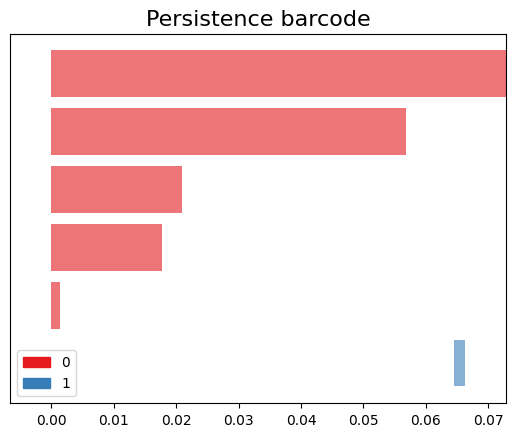

In [94]:
tree.compute_persistence()
gudhi.plot_persistence_barcode(tree.persistence())
print(tree.persistence())

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

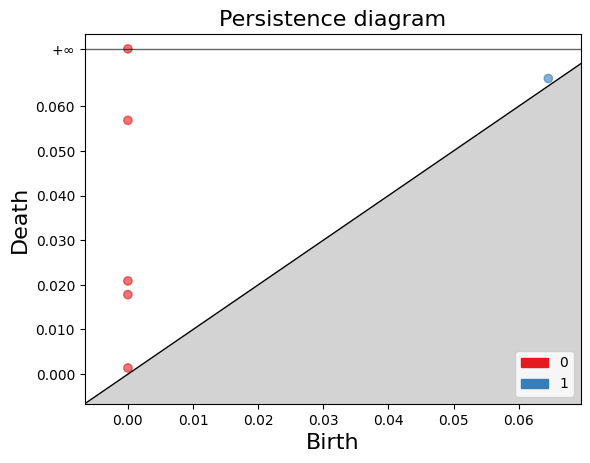

In [95]:
gudhi.plot_persistence_diagram(tree.persistence())
